In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson 

sys.path.append(os.path.abspath("../src"))

os.makedirs("figures", exist_ok=True)

L = 10.0
N = 129  
dx = L / N
x = np.linspace(-L / 2, L / 2, N, endpoint=False)

alpha = 1.0
dt = 0.001
steps = 500

In [2]:
def gaussian_bump(x, center=0.0, width=0.5, amplitude=1.0):
    return amplitude * np.exp(-((x - center) ** 2) / (2 * width ** 2))

u0 = gaussian_bump(x, center=0.0, width=0.5)

In [3]:
from numerics.laplacians import make_laplacian_1d
from pdes.heat_solve import run_heat_solver_1d

laplacian = make_laplacian_1d(N, dx)
u_history = run_heat_solver_1d(u0, laplacian, alpha, dt, steps)

In [4]:
u_ref = u0.copy()
l2_error = np.sqrt(simpson((u_history[-1] - u_ref)**2, x))
print(f"L² error vs initial: {l2_error:.6e}")

L² error vs initial: 5.091487e-01


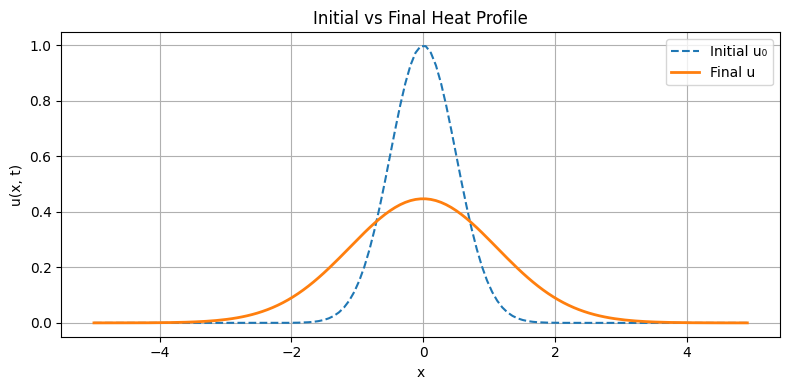

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(x, u0, label="Initial u₀", linestyle="--")
plt.plot(x, u_history[-1], label="Final u", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Initial vs Final Heat Profile")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/final_comparison.png", dpi=300)
plt.show()